In [1]:
library(rpart)
library(rattle)
library(rpart.plot)
library(RColorBrewer)
library(caret)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.

Loading required package: ggplot2

Loading required package: lattice



In [2]:
## Get the data from a csv file

titanic <- read.csv("titanic.csv")

In [3]:
## Examine dataframe

titanic

Survived,Pclass,Name,Sex,Age,Siblings.Spouses.Aboard,Parents.Children.Aboard,Fare
<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>
0,3,Mr. Owen Harris Braund,male,22,1,0,7.2500
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38,1,0,71.2833
1,3,Miss. Laina Heikkinen,female,26,0,0,7.9250
1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,1,0,53.1000
0,3,Mr. William Henry Allen,male,35,0,0,8.0500
0,3,Mr. James Moran,male,27,0,0,8.4583
0,1,Mr. Timothy J McCarthy,male,54,0,0,51.8625
0,3,Master. Gosta Leonard Palsson,male,2,3,1,21.0750
1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27,0,2,11.1333


In [6]:
## 75% sample for training data
sample_size <- floor(0.75 * nrow(titanic))


[1] 887

In [8]:
## Use seed to make models reproduceable
set.seed(123)

## Determine the row numbers to sample
train_split <- sample(seq_len(nrow(titanic)), size = sample_size)

In [16]:
## Split the data into 75% training and 25% testing
train <- titanic[train_split, ]
test <- titanic[-train_split, ]

## Validate that the dataframes are correct

cat("There are ", nrow(train), " rows in the training data. \n")
cat("There are ", nrow(test), " rows in the testing data.")

There are  665  rows in the training data 
There are  222  rows in the test data

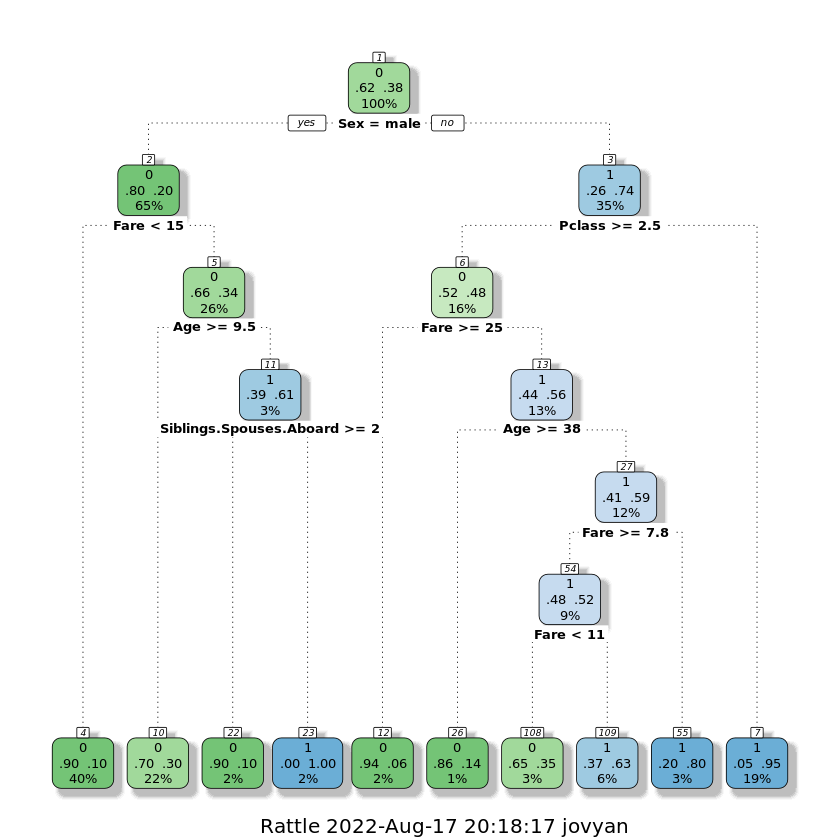

In [19]:
## Build a decision tree model
my_tree <- rpart(Survived ~ Pclass + Sex + Age + Siblings.Spouses.Aboard + Parents.Children.Aboard + Fare, data = train, method = "class")

## Plot the model results
fancyRpartPlot(my_tree)

In [23]:
library (maptree)
draw.tree(my_tree)

ERROR: Error in library(maptree): there is no package called ‘maptree’


In [20]:





## Create the probabilities for each test data point
predict_probs <- as.data.frame(predict(my_tree, newdata = test, type = "p"))

## Create the predicted test values and ground truth values
predicted <- as.integer(predict_probs$`1` > .5)
actual <- test$Survived

## Build confusion matrix
confusionMatrix(as.factor(predicted), as.factor(actual), positive = "1")

## https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/



Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 128  31
         1   8  55
                                         
               Accuracy : 0.8243         
                 95% CI : (0.7678, 0.872)
    No Information Rate : 0.6126         
    P-Value [Acc > NIR] : 6.659e-12      
                                         
                  Kappa : 0.6107         
                                         
 Mcnemar's Test P-Value : 0.000427       
                                         
            Sensitivity : 0.6395         
            Specificity : 0.9412         
         Pos Pred Value : 0.8730         
         Neg Pred Value : 0.8050         
             Prevalence : 0.3874         
         Detection Rate : 0.2477         
   Detection Prevalence : 0.2838         
      Balanced Accuracy : 0.7904         
                                         
       'Positive' Class : 1              
                                         